# Modélisation

Nous faisons une régression pour expliquer le nombre total de médailles gagnées en fonction de quelques variables.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
%run Fusion_donnees.ipynb

**Préparation de la base de données avec les variables d'intérêt en log**

In [16]:
#création de la base avec les variables d'intérêt
base_reg = df_dummies[['Total', 'Population', 'PIB par hab', 'Investissement sport', 'Esperance de vie à naissance', 
                       'Annee_1992', 'Annee_1996', 'Annee_2000', 'Annee_2004', 'Annee_2008', 'Annee_2012', 'Annee_2016', 'Annee_2020', 
                       'Pays_hote_oui_non']]

In [17]:
#transformation en log des variables (pour que l'interprétation des coefficients de la régression se fasse selon un modèle niveau-log)
base_reg['log_Population'] = np.log(base_reg["Population"])
base_reg['log_PIB par hab'] = np.log(base_reg["PIB par hab"])
base_reg['log_Investissement Sport'] = np.log(base_reg["Investissement sport"])
base_reg

C:\Users\Clemence\AppData\Local\Temp/ipykernel_54440/824369233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_reg['log_Population'] = np.log(base_reg["Population"])
C:\Users\Clemence\AppData\Local\Temp/ipykernel_54440/824369233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_reg['log_PIB par hab'] = np.log(base_reg["PIB par hab"])
C:\Users\Clemence\AppData\Local\Temp/ipykernel_54440/824369233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,Total,Population,PIB par hab,Investissement sport,Esperance de vie à naissance,Annee_1992,Annee_1996,Annee_2000,Annee_2004,Annee_2008,Annee_2012,Annee_2016,Annee_2020,Pays_hote_oui_non,log_Population,log_PIB par hab,log_Investissement Sport
0,108,2.565140e+08,25418.990776,19250.647,75.617073,1,0,0,0,0,0,0,0,0,19.362694,10.143252,9.865300
1,54,1.164970e+09,366.460692,NaN,69.355000,1,0,0,0,0,0,0,0,0,20.875961,5.903891,NaN
2,31,1.073639e+07,2057.103595,NaN,74.801000,1,0,0,0,0,0,0,0,0,16.189149,7.629054,NaN
3,22,3.915768e+07,16112.188915,NaN,77.410000,1,0,0,0,0,0,0,0,1,17.483107,9.687331,NaN
4,29,4.374796e+07,8126.670390,NaN,72.497561,1,0,0,0,0,0,0,0,0,17.593956,9.002907,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2,5.530719e+06,48773.281169,NaN,81.785366,0,0,0,0,0,0,0,1,0,15.525828,10.794938,NaN
60,1,2.637828e+07,2325.723705,NaN,57.783000,0,0,0,0,0,0,0,1,0,17.088051,7.751787,NaN
61,1,3.107294e+07,2205.529016,NaN,64.074000,0,0,0,0,0,0,0,1,0,17.251848,7.698723,NaN
62,1,2.620495e+06,4547.059721,1733.200,71.901000,0,0,0,0,0,0,0,1,0,14.778874,8.422236,7.457725


In [18]:
#compter les valeurs manquantes pour l'investissement dans le sport
base_reg["Investissement sport"].isna().sum()

264

In [19]:
#Pour faire la régression, on enlève l'investissement dans le sport (car il y a trop de NA) et on enlève les NA restants

base_reg_sans_sport = base_reg.drop(["Investissement sport", "log_Investissement Sport"], axis=1)

indices_to_keep = ~base_reg_sans_sport.isin([np.nan, np.inf, -np.inf]).any(1)

base_reg_sansNA = base_reg_sans_sport[indices_to_keep].astype(np.float64)
base_reg_sansNA

,Total,Population,PIB par hab,Esperance de vie à naissance,Annee_1992,Annee_1996,Annee_2000,Annee_2004,Annee_2008,Annee_2012,Annee_2016,Annee_2020,Pays_hote_oui_non,log_Population,log_PIB par hab
0,108.0,2.565140e+08,25418.990776,75.617073,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.362694,10.143252
1,54.0,1.164970e+09,366.460692,69.355000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.875961,5.903891
2,31.0,1.073639e+07,2057.103595,74.801000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.189149,7.629054
3,22.0,3.915768e+07,16112.188915,77.410000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.483107,9.687331
4,29.0,4.374796e+07,8126.670390,72.497561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.593956,9.002907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,4.0,1.289328e+08,8329.271313,75.054000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.674802,9.027531
59,2.0,5.530719e+06,48773.281169,81.785366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.525828,10.794938
60,1.0,2.637828e+07,2325.723705,57.783000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.088051,7.751787
61,1.0,3.107294e+07,2205.529016,64.074000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.251848,7.698723


**Création de la table de corrélation entre les variables**

<AxesSubplot:>

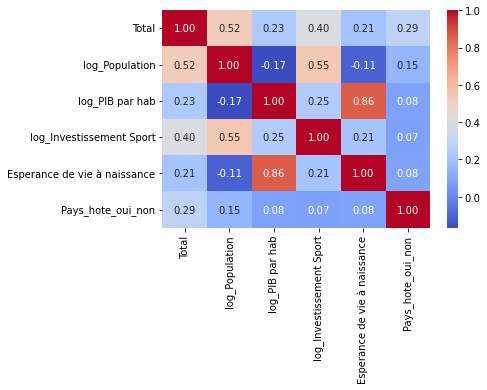

In [20]:
base_corr = base_reg[['Total', 'log_Population', 'log_PIB par hab', 'log_Investissement Sport', 'Esperance de vie à naissance', 'Pays_hote_oui_non']]

sns.heatmap(base_corr.corr(), cmap='coolwarm', annot=True, fmt=".2f")

Les coefficients de corrélation entre le nombre total de médailles et le logarithme de la population, le logarithme du PIB par habitant, le logarithme de l'investissement dans le sport, et le fait d'être le pays hôye ou non, sont positifs : donc plus ces variables augmentent, plus le nombre de médailles augmente.

Le coefficient de corrélation entre le nombre total de médailles et le logarithme de la population est assez élevé : 0,52 (coefficient le plus élevé parmi toutes les variables explicatives). Cela signifie que la relation linéaire entre ces deux variables est la plus forte.

Attention : le coefficient de corrélation entre l'investissement dans le sport et la population est assez élevé : les deux variables sont corrélées, ce qui risque de biaiser l'analyse.

**Régression linéaire avec `statsmodels` (sans l'investissement dans le sport)**

Initialement, nous souhaitions faire la régression suivante :
$$
Y = \beta_0 + \beta_1 Pays hote + \beta_2 log(Population) + \beta_3 log(PIB par hab) + \beta_4 log(Investissement sport) + \beta_5 Espérance vie + \sum_{i=1992}^{2020} \beta_i 1_{Année_i}  + \epsilon
$$
Mais au vu du nombre trop important de NA dans la variable 'Investissement sport', cela nous aurait obligées à supprimer 264 observations sur les 449, donc nous avons décidé de ne pas inclure cette variable.

Par conséquent, on fait la régression suivante sans l'investissement :
$$
Y = X\beta + \epsilon
$$
où X est tel que :
$$
Y = \beta_0 + \beta_1 Pays hote + \beta_2 log(Population) + \beta_3 log(PIB par hab) + \beta_4 Espérance vie + \sum_{i=1992}^{2020} \beta_i 1_{Année_i}  + \epsilon
$$


Les indicatrices des années nous servent uniquement à contrôler les années, les coefficients associés ne nous intéressent pas.

/!\ :
Lorsque la variable explicative est en log, on interprète $\beta_i/100$.  
Exemple : toutes choses égales par ailleurs : lorsque la population augmente d’1%, le nombre de médailles gagnées augmente de $\beta_i/100$.
(modèle niveau-log)


In [21]:
X = sm.add_constant(base_reg_sansNA.drop(["Population", "PIB par hab", "Total"], axis = 1))

results = sm.OLS(base_reg_sansNA['Total'], X).fit()

# Afficher le tableau de régression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     28.12
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           5.46e-44
Time:                        10:55:39   Log-Likelihood:                -1802.9
No. Observations:                 433   AIC:                             3630.
Df Residuals:                     421   BIC:                             3679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Le R² ajusté vaut 0.408 : le modèle est plutôt pertinent.

Hormis l'espérance de vie à la naissance, les coefficients des autres variables explicatives sont tous statistiquement significatifs car la p-value est inférieure à 1% donc on rejette l'hypothèse de nullité du coefficient.
Pour l'espérance de vie à la naissance, la p-value vaut 0.313 > 0.05, donc le coefficient n'est pas significatif.

Les coefficients des variables explicatives sont positifs : toutes choses égales par ailleurs, une hausse d'une des variables explicatives entraine une hausse du nombre du médailles gagnées.

* Toutes choses égales par ailleurs, une hausse de la population de 1% entraine une hausse du nombre de médailles gagnées de 0,070 médailles. Cela semble logique : plus la population est élevée, plus le pays a de chances d'avoir un athlète très fort.   


* Toutes choses égales par ailleurs, une hausse du PIB par habitant de 1% entraine une hausse du nombre de médailles gagnées de 0,046 médailles. Cela semble également logique : si le PIB par habitant est plus élevé, il aura de plus de moyens pour investir dans les infrastructures de sport, dans la préparation des athlètes et pour avoir de meilleurs entraineurs. De plus, lorsque le PIB par habitant est élevé, les jeunes vont plus souvent s'inscrire au sport, et pour les athlètes de haut niveau, ils peuvent davantage consacrer de temps à s'entrainer. 


* Le fait d'être pays hôte augmente le nombre de médailles gagnées de 29 médailles. Ceci peut s'expliquer par deux explications. D’une part, les athlètes du pays hôte ont des avantages : encouragements du public, moins de fatigue due au transport, ils connaissent le terrain où se déroule la compétition. D’autre part, les pays hôtes des jeux peuvent inscrire plus de concurrents aux épreuves et ils ont une place acquise dans chacune des disciplines.Néanmoins, ce coefficient est très élevé : ceci est peut-être dû au fait que la Chine qui a accueilli les JO de Pékin gagne beaucoup de médailles, ou au fait que le Japon en 2020 a gagné beaucoup de médailles en étant pays hôte, ce qui a pu créer un biais et une surestimation du coefficient.